**Advantages**
1. Type Safety
2. Enhanced Readability

In [1]:
from typing import TypedDict

class User(TypedDict):
    username: str
    password: str

user = User(username="admin", password="admin123")
print(user)

{'username': 'admin', 'password': 'admin123'}


In [2]:
from typing import Union
#Union Allows two or more input types
def square(x: Union[int, float]) ->  float:
    return x * x

print(square(5))
print(square(5.5))


25
30.25


In [3]:
from typing import Optional
#only if its there else none should be there
def nice_messages(name: Optional[float]) -> None:
  if name is None:
    return ("Hey Random Person")
  else:
    return (f"Hey {name}, {type(name)}")

print(nice_messages(None))
print(nice_messages("John"))


Hey Random Person
Hey John, <class 'str'>


In [4]:
from typing import Optional
#Takes any format
def nice_messages(name: Optional[float]) -> None:
  if name is None:
    return ("Hey Random Person")
  else:
    return (f"Hey {name}, {type(name)}")

print(nice_messages(None))
print(nice_messages("John"))


Hey Random Person
Hey John, <class 'str'>


# Basic Graph


In [5]:
!pip install -q langgraph IPython

In [6]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

class AgentState(TypedDict):
  message : str
  life : str

def greeting_node(state: AgentState) -> StateGraph:
  #Simle greeter node
  state['message'] = "Hey "+ state['message'] + " how was your day"

  return state

In [7]:
graph = StateGraph(AgentState)

graph.add_node("greeter",greeting_node)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")
app = graph.compile()

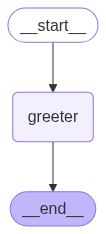

In [8]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
result = app.invoke({"message": "Bob"})

In [10]:
result['message']

'Hey Bob how was your day'

# Graph 2

In [11]:
from typing import Dict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
  value : List[int]
  name : str
  result : str

In [12]:
def process_values(state: AgentState) -> AgentState:

  state['result'] = f"hi there  {state['name']} : your values are {sum(state['value'])}"

  return state

In [13]:
graph = StateGraph(AgentState)

graph.add_node("process_values",process_values)
graph.set_entry_point("process_values")
graph.set_finish_point("process_values")
app = graph.compile()

In [14]:
result = app.invoke({"value": [12,12,12] , "name" : "Bob"})
result['result']

'hi there  Bob : your values are 36'

# Sequential Graph

In [15]:
from typing import Dict, List
from langgraph.graph import StateGraph

In [16]:
class AgentState(TypedDict):
  name : str
  age : str
  final : str

In [17]:
def first_node(state: AgentState) -> AgentState:
  state['final'] = f"Hi {state['name']}!"
  return state
def second_node(state: AgentState) -> AgentState:
  state['final'] = state['final']  + f" your age {state['age']}!"
  return state


In [18]:
graph = StateGraph(AgentState)

graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node","second_node")
graph.set_finish_point("second_node")
app = graph.compile()

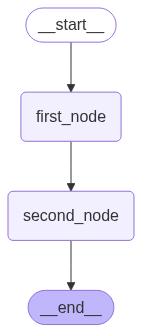

In [19]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
result = app.invoke({'name' : "Ronny", 'age' : 23})
result['final']

'Hi Ronny! your age 23!'

# Conditional Logic

In [21]:
from typing import Dict, List
from langgraph.graph import StateGraph , START, END

class Agentstate(TypedDict):
    number : int
    operation :  str
    number2 : int
    output : int

def initial(state: Agentstate) -> Agentstate:
    print(state)
    return state

def add_node(state: Agentstate) -> Agentstate:
    state['output'] = state['number'] + state['number2']
    return state

def subtract_node(state: Agentstate) -> Agentstate:
    state['output'] = state['number'] - state['number2']
    return state

def selector(state : Agentstate) -> Agentstate:
    if state['operation'] == 'add':
        return "Addition"
    elif state['operation'] == 'subtract':
        return "Substraction"
    else:
        raise ValueError("Unknown operation")
    
graph = StateGraph(Agentstate)
graph.add_node("add_node", add_node)
graph.add_node("subtract_node", subtract_node)  
graph.add_node("initial", initial)

graph.add_edge(START, "initial")
graph.add_conditional_edges("initial", selector, {
    "Addition": "add_node",
    "Substraction": "subtract_node"
})

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)
app = graph.compile()

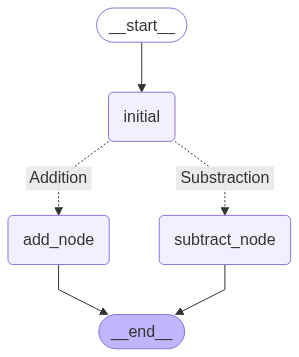

In [22]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
ini = Agentstate(number=16, operation='add', number2=5, output=0)
print(app.invoke(ini))

{'number': 16, 'operation': 'add', 'number2': 5, 'output': 0}
{'number': 16, 'operation': 'add', 'number2': 5, 'output': 21}


In [24]:
from langgraph.graph import StateGraph
from typing import Dict , List ,TypedDict
import random
class AgentState(TypedDict):
    name : str
    number : list[int]
    counter : int


def greeting_node(state:AgentState):
    state["name"] = f"hi f{state['name']}"
    state['counter'] = 0
    return state

def Random_node(state:AgentState):
    state['number'].append(random.randint(0,10))
    state['counter'] +=1
    return state

def checker(state:AgentState):
    if state['counter'] <5 :
        return "loop"
    else:
        return "exit"
    
graph = StateGraph(AgentState)

graph.add_node("greeting_node",greeting_node)
graph.add_node("Random_node",Random_node)

graph.add_edge(START,"greeting_node")
graph.add_edge("greeting_node", "Random_node")
graph.add_conditional_edges("Random_node",checker,{
    "loop" : "Random_node",
    "exit" : END
})
app = graph.compile()



# Correct initialization
ini = AgentState(name="Varun", number=[], counter=0)

print(app.invoke(ini))

{'name': 'hi fVarun', 'number': [2, 7, 4, 4, 8], 'counter': 5}


# Agent 1

In [25]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
os.environ["GOOGLE_API_KEY"]="API"


In [26]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph,START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage

class AgentState(TypedDict):
    messages : List[HumanMessage]

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

def process(state: AgentState) -> AgentState:

    response = llm.invoke(state["messages"])
    print("AI:",response.content)
    return state

graph = StateGraph(AgentState)
graph.add_node("process", process)

graph.add_edge(START,"process")
graph.add_edge("process",END)
agent = graph.compile()


user_input = input("ENTER:")
while user_input.lower() != "exit":
    agent.invoke({"messages": [HumanMessage(content= user_input)]})
    user_input = input("ENTER:")

# Agent 2

In [27]:
from langchain_core.messages import HumanMessage,AIMessage
from typing import TypedDict,List ,Union
from langgraph.graph import StateGraph, START,END
from langchain_google_genai import ChatGoogleGenerativeAI

class AgentState(TypedDict):
    messages : List[Union[HumanMessage, AIMessage]]

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

def process(state=AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    print("AI:",response.content)
    state["messages"].append(AIMessage(content=response.content))
    print("\n")
    print(state["messages"])
    print("\n")
    return state
graph = StateGraph(AgentState)
graph.add_node("process", process)

graph.add_edge(START,"process")
graph.add_edge("process",END)
agent = graph.compile()

conversation_history = []
user_input = input("ENTER:")
while user_input.lower() != "exit":
    conversation_history.append(HumanMessage(content= user_input))
    result = agent.invoke({"messages":conversation_history})
    user_input = input("ENTER:")

# React Agent

In [28]:
from langgraph.graph import StateGraph, START ,END
from typing import Annotated,Sequence,TypedDict
from langchain_core.messages import BaseMessage,ToolMessage,SystemMessage
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode
from langchain_google_genai import ChatGoogleGenerativeAI




class AgentState(TypedDict):
    messages : Annotated[Sequence[BaseMessage],add_messages]

@tool
def add(a: int ,b:int):
    "This is an Addition tool"
    return a+b


@tool 
def multiply(a : int ,b :int):
    "this is divide tool"
    return a*b

tools = [add,multiply]
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash").bind_tools(tools)

def Model_call(state:AgentState) -> AgentState:
    system_prompt = SystemMessage(content="you are my Ai assistant ,Please answer my questions")
    response = llm.invoke([system_prompt]+ state["messages"])
    return {"messages" : [response]}

def should_cont(state :AgentState):
    messages = state["messages"]
    last_message = messages[-1]
    if not last_message.tool_calls:
        return "End"
    else:
        return "continue"

graph = StateGraph(AgentState)
graph.add_node("our_agent", Model_call)

tool_node = ToolNode(tools=tools)
graph.add_node("tools",tool_node)

graph.set_entry_point("our_agent")
graph.add_conditional_edges("our_agent",should_cont,
                            {  
                            "continue" : "tools",
                            "End" : END
                            })
graph.add_edge("tools","our_agent")
app = graph.compile()

def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

inputs = {"messages": [("user", "Add 40 + 12 and multiply 40 and 30")]}
print_stream(app.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Add 40 + 12 and multiply 40 and 30


ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 API key not valid. Please pass a valid API key. [reason: "API_KEY_INVALID"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
, locale: "en-US"
message: "API key not valid. Please pass a valid API key."
]

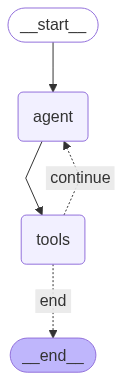

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))